In [8]:
#Carga de paquetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de dataframe

ruta = os.getcwd() + '\\processed\\'

df_datos_nuevo = pd.read_csv(ruta+'data_procesada.csv')

In [3]:
#Datos para despues hacer la regresión lineal

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# variables dependientes e independientes X e y
X = pd.DataFrame(df_datos_nuevo[ ['bedrooms',
                                  'beds', 
                                  'review_scores_rating', 
                                  'allowed', 
                                  'dryer', 
                                  'essentials', 
                                  'hot',
                                 'kitchen',                                       
                                 'long',                                          
                                 'parking',                                       
                                 'term',                                          
                                 'tv',                                            
                                 'wifi',                                          
                                 'room_type_entire_home_apt',                    
                                 'room_type_private_room',                        
                                 'property_type_Entire_condominium_condo',        
                                 'property_type_Entire_loft',                     
                                 'property_type_Entire_rental_unit',              
                                 'property_type_Private_room_in_rental_unit',     
                                 'property_type_Private_room_in_residential_home']]) 
y = pd.DataFrame(df_datos_nuevo['price']) 

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [4]:
# division en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state = 1234, shuffle = True)

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
datos_train = pd.DataFrame(
                    np.hstack((X_train, y_train)),
                    columns=['bedrooms',
                                  'beds', 
                                  'review_scores_rating', 
                                  'allowed', 
                                  'dryer', 
                                  'essentials', 
                                  'hot',
                                 'kitchen',                                       
                                 'long',                                          
                                 'parking',                                       
                                 'term',                                          
                                 'tv',                                            
                                 'wifi',                                          
                                 'room_type_entire_home_apt',                    
                                 'room_type_private_room',                        
                                 'property_type_Entire_condominium_condo',        
                                 'property_type_Entire_loft',                     
                                 'property_type_Entire_rental_unit',              
                                 'property_type_Private_room_in_rental_unit',     
                                 'property_type_Private_room_in_residential_home'
                             ,'price']
              )


formula_r = 'price ~ bedrooms+beds+review_scores_rating+allowed+dryer+essentials'
formula_r = formula_r + '+hot+kitchen+long+parking+term+tv'
formula_r = formula_r + '+wifi+room_type_entire_home_apt+room_type_private_room'
formula_r = formula_r + '+property_type_Entire_condominium_condo+property_type_Entire_loft'
formula_r = formula_r + '+property_type_Entire_rental_unit+property_type_Private_room_in_rental_unit'
formula_r = formula_r + '+property_type_Private_room_in_residential_home'


modelo = smf.ols(formula = formula_r, data = datos_train)

modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     46.26
Date:                Sun, 16 Oct 2022   Prob (F-statistic):          1.57e-105
Time:                        01:45:43   Log-Likelihood:                -11236.
No. Observations:                 917   AIC:                         2.251e+04
Df Residuals:                     900   BIC:                         2.259e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [6]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
Intercept,50997.195150,57664.148329
bedrooms,1563.540787,10334.265729
beds,29220.785116,37898.480219
review_scores_rating,-640.473285,5715.356787
allowed,-3826.936184,5282.581293
dryer,-4917.053201,2473.845417
essentials,-6298.543033,920.239909
hot,-4008.199496,3828.222442
kitchen,681.722904,7400.412586
long,-3569.389728,710.975811


In [7]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.to_numpy().flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train


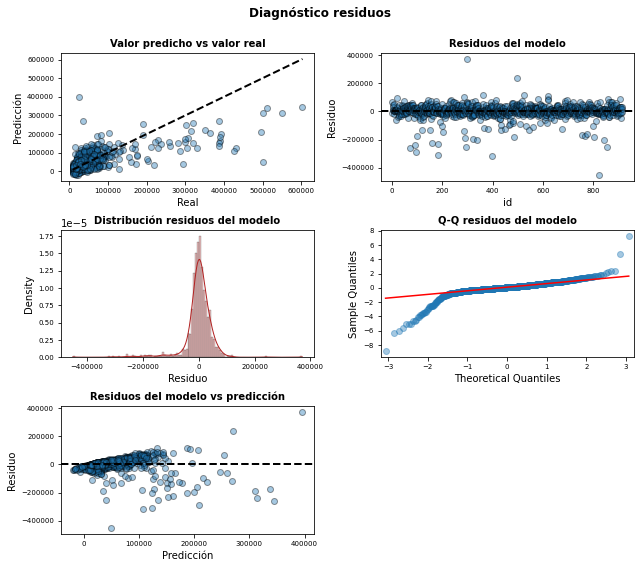

In [9]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [10]:
from scipy import stats
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.7353718280792236, pvalue=8.642128425945988e-36)

In [11]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 552.1265538706649, p-value = 1.2800949104260676e-120


Ambos test muestran claras evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value << 0.01).